In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import lightgbm as lgb
import xgboost as xgb
import catboost as cb
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
file_path = "dataset/malewarePreprocessed.csv"
data = pd.read_csv(file_path)

In [4]:
# Encode categorical variables
label_encoder = LabelEncoder()
data['proto'] = label_encoder.fit_transform(data['proto'])
data['conn_state'] = label_encoder.fit_transform(data['conn_state'])
data['history'] = label_encoder.fit_transform(data['history'])
data['label'] = label_encoder.fit_transform(data['label'])

scaler = StandardScaler()
numerical_features = ['duration', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts']  # Add other numerical columns
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Split the dataset into features (X) and the target variable (y)
X = data.drop(columns=['ts', 'id.orig_h', 'id.resp_h', 'label'])
y = data['label']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# LightGBM
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
lgb_predictions = lgb_model.predict(X_test)
lgb_accuracy = accuracy_score(y_test, lgb_predictions)
lgb_report = classification_report(y_test, lgb_predictions)

# XGBoost
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_report = classification_report(y_test, xgb_predictions)

# CatBoost
cb_model = cb.CatBoostClassifier()
cb_model.fit(X_train, y_train)
cb_predictions = cb_model.predict(X_test)
cb_accuracy = accuracy_score(y_test, cb_predictions)
cb_report = classification_report(y_test, cb_predictions)

# Compare results

print("LightGBM Accuracy:", lgb_accuracy)
print("LightGBM Classification Report:")
print(lgb_report)

print("\nXGBoost Accuracy:", xgb_accuracy)
print("XGBoost Classification Report:")
print(xgb_report)

print("\nCatBoost Accuracy:", cb_accuracy)
print("CatBoost Classification Report:")
print(cb_report)

[LightGBM] [Info] Number of positive: 5084666, number of negative: 17968
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.225202 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 256
[LightGBM] [Info] Number of data points in the train set: 5102634, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.996479 -> initscore=5.645392
[LightGBM] [Info] Start training from score 5.645392
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [8]:
# Accuracy
lgb_accuracy = accuracy_score(y_test, lgb_predictions)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
cb_accuracy = accuracy_score(y_test, cb_predictions)

# Precision
lgb_precision = precision_score(y_test, lgb_predictions)
xgb_precision = precision_score(y_test, xgb_predictions)
cb_precision = precision_score(y_test, cb_predictions)

# Recall
lgb_recall = recall_score(y_test, lgb_predictions)
xgb_recall = recall_score(y_test, xgb_predictions)
cb_recall = recall_score(y_test, cb_predictions)

# F1-score
lgb_f1 = f1_score(y_test, lgb_predictions)
xgb_f1 = f1_score(y_test, xgb_predictions)
cb_f1 = f1_score(y_test, cb_predictions)

# ROC-AUC
lgb_roc_auc = roc_auc_score(y_test, lgb_predictions)
xgb_roc_auc = roc_auc_score(y_test, xgb_predictions)
cb_roc_auc = roc_auc_score(y_test, cb_predictions)

# Confusion matrix
lgb_cm = confusion_matrix(y_test, lgb_predictions)
xgb_cm = confusion_matrix(y_test, xgb_predictions)
cb_cm = confusion_matrix(y_test, cb_predictions)

# Compare numerical metrics
metrics_dict = {
    'LightGBM': {
        'Accuracy': lgb_accuracy,
        'Precision': lgb_precision,
        'Recall': lgb_recall,
        'F1-Score': lgb_f1,
        'ROC-AUC': lgb_roc_auc
    },
    'XGBoost': {
        'Accuracy': xgb_accuracy,
        'Precision': xgb_precision,
        'Recall': xgb_recall,
        'F1-Score': xgb_f1,
        'ROC-AUC': xgb_roc_auc
    },
    'CatBoost': {
        'Accuracy': cb_accuracy,
        'Precision': cb_precision,
        'Recall': cb_recall,
        'F1-Score': cb_f1,
        'ROC-AUC': cb_roc_auc
    }
}

metrics_df = pd.DataFrame(metrics_dict).T
print(metrics_df)

          Accuracy  Precision  Recall  F1-Score   ROC-AUC
LightGBM  1.000000   1.000000     1.0       1.0  1.000000
XGBoost   1.000000   1.000000     1.0       1.0  1.000000
CatBoost  0.999999   0.999999     1.0       1.0  0.999891


In [9]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for LightGBM
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, lgb_model.predict_proba(X_test)[:, 1])
roc_auc_lgb = auc(fpr_lgb, tpr_lgb)

# Compute ROC curve and ROC area for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Compute ROC curve and ROC area for CatBoost
fpr_cb, tpr_cb, _ = roc_curve(y_test, cb_model.predict_proba(X_test)[:, 1])
roc_auc_cb = auc(fpr_cb, tpr_cb)


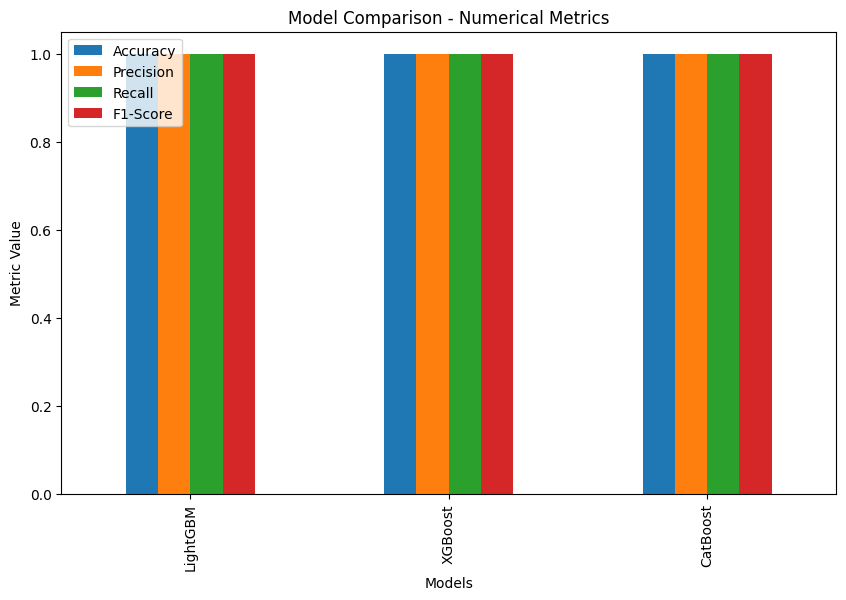

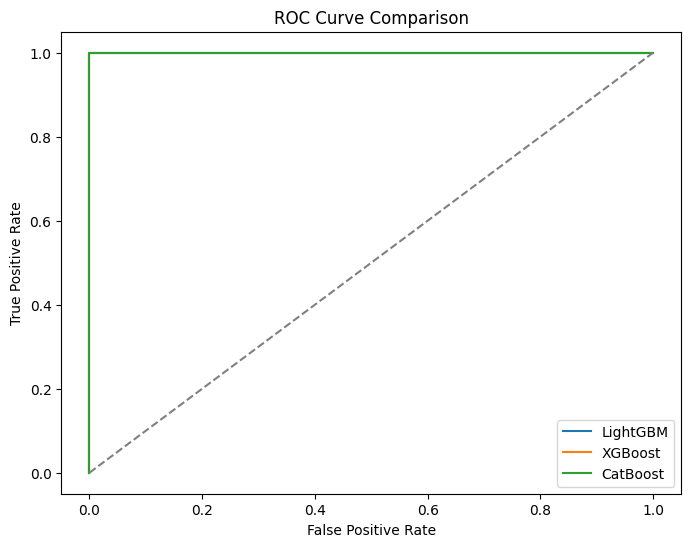

In [11]:
import matplotlib.pyplot as plt

# Visualize numerical metrics (e.g., accuracy, precision, recall) using bar charts
metrics_df[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison - Numerical Metrics')
plt.xlabel('Models')
plt.ylabel('Metric Value')
plt.legend(loc='upper left')
plt.show()

# Visualize ROC curves for each model
plt.figure(figsize=(8, 6))
plt.plot(fpr_lgb, tpr_lgb, label='LightGBM')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')
plt.plot(fpr_cb, tpr_cb, label='CatBoost')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()